# Convolutional Autoencoder Example
modified from https://blog.keras.io/building-autoencoders-in-keras.html

## Prepare Data Set

In [1]:
import tensorflow as tf
import numpy as np
import scipy.io
mnist = scipy.io.loadmat('mnist.mat')
x_train = mnist['train'].swapaxes(0,2).swapaxes(1,2)
x_test = mnist['test'].swapaxes(0,2).swapaxes(1,2)
#from tensorflow.keras.datasets import mnist
#(x_train, _),(x_test, _) = mnist.load_data()

/home/wangj/anaconda3/envs/DLiES/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 88 from C header, got 96 from PyObject
  return f(*args, **kwds)


## Check Data 

In [2]:
import matplotlib.pyplot as plt
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = np.reshape(x_train, (60000, 28, 28,1))
x_test = np.reshape(x_test, (10000, 28, 28,1))

print('x_train shape: {}  x_test shape: {}'.format(np.shape(x_train),np.shape(x_test)))
for i in range(16):
    plt.subplot(4, 4, 1 + i, xticks=[], yticks=[])
    img_id = np.random.randint(np.shape(x_train)[0])
    im = x_train[img_id,::].reshape([28,28])
    plt.imshow(im)
    plt.gray()

x_train shape: (60000, 28, 28, 1)  x_test shape: (10000, 28, 28, 1)


## Build Model 

In [3]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D

autoencoder = tf.keras.Sequential()
#Encoder
autoencoder.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape=x_train.shape[1:]))
autoencoder.add(MaxPooling2D(pool_size=(2, 2)))
autoencoder.add(Conv2D(32,(3,3),activation='relu',padding='same'))

#Compressed representation
autoencoder.add(MaxPooling2D(pool_size=(2, 2)))

#Decoder
autoencoder.add(Conv2D(32,(3,3),activation='relu',padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(32,(3,3),activation='relu',padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(1,(3,3),activation='sigmoid',padding='same'))

autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        9248      
__________

## Train Model

In [4]:
autoencoder.compile(optimizer='adadelta', loss='mse')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 43s 719us/step - loss: 6.8904 - val_loss: 2.1242
Epoch 2/100
60000/60000 [==============================] - 2s 34us/step - loss: 2.2163 - val_loss: 1.3828
Epoch 3/100
60000/60000 [==============================] - 2s 35us/step - loss: 1.6349 - val_loss: 1.1028
Epoch 4/100
60000/60000 [==============================] - 2s 36us/step - loss: 1.3571 - val_loss: 0.9557
Epoch 5/100
60000/60000 [==============================] - 2s 37us/step - loss: 1.1885 - val_loss: 0.8967
Epoch 6/100
60000/60000 [==============================] - 2s 40us/step - loss: 1.0697 - val_loss: 0.8010
Epoch 7/100
60000/60000 [==============================] - 2s 41us/step - loss: 0.9824 - val_loss: 0.7371
Epoch 8/100
60000/60000 [==============================] - 3s 42us/step - loss: 0.9196 - val_loss: 0.7029
Epoch 9/100
60000/60000 [==============================] - 3s 42us/step - loss: 0.8726 - val_loss: 0

60000/60000 [==============================] - 3s 42us/step - loss: 0.3897 - val_loss: 0.3225
Epoch 78/100
60000/60000 [==============================] - 2s 41us/step - loss: 0.3883 - val_loss: 0.3169
Epoch 79/100
60000/60000 [==============================] - 2s 42us/step - loss: 0.3850 - val_loss: 0.3145
Epoch 80/100
60000/60000 [==============================] - 2s 41us/step - loss: 0.3869 - val_loss: 0.3177
Epoch 81/100
60000/60000 [==============================] - 3s 42us/step - loss: 0.3821 - val_loss: 0.3137
Epoch 82/100
60000/60000 [==============================] - 2s 41us/step - loss: 0.3815 - val_loss: 0.3116
Epoch 83/100
60000/60000 [==============================] - 2s 41us/step - loss: 0.3808 - val_loss: 0.3121
Epoch 84/100
60000/60000 [==============================] - 2s 40us/step - loss: 0.3823 - val_loss: 0.3163
Epoch 85/100
60000/60000 [==============================] - 2s 41us/step - loss: 0.3836 - val_loss: 0.3162
Epoch 86/100
60000/60000 [========================

## Evaluate Model

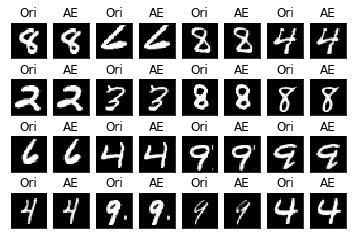

In [5]:
x_recon = autoencoder.predict(x_test)
for i in range(16):
    plt.subplot(4, 8, 1 + i*2, xticks=[], yticks=[])
    img_id = np.random.randint(np.shape(x_test)[0])
    im = x_test[img_id,::].reshape([28,28])
    plt.imshow(im)
    plt.gray()
    plt.title('Ori')
    plt.subplot(4, 8, 2 + i*2, xticks=[], yticks=[])
    
    im = x_recon[img_id,::].reshape([28,28])
    plt.imshow(im)
    plt.gray()
    plt.title('AE')

# Denosing with Autoencoder 

## Add noise to data

In [6]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

## Check Data 

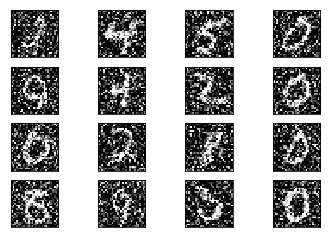

In [7]:
for i in range(16):
    plt.subplot(4, 4, 1 + i, xticks=[], yticks=[])
    img_id = np.random.randint(np.shape(x_train)[0])
    im = x_train_noisy[img_id,::].reshape([28,28])
    plt.imshow(im)
    plt.gray()

## Create a New Model for Denosing

In [28]:
tf.reset_default_graph()
tf.keras.backend.clear_session()

autoencoder = tf.keras.Sequential()
#Encoder
autoencoder.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape=x_train.shape[1:]))
autoencoder.add(MaxPooling2D(pool_size=(2, 2)))
autoencoder.add(Conv2D(16,(3,3),activation='relu',padding='same'))
#Compressed representation
autoencoder.add(MaxPooling2D(pool_size=(2, 2)))

#Decoder
autoencoder.add(Conv2D(16,(3,3),activation='relu',padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(32,(3,3),activation='relu',padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(1,(3,3),activation='sigmoid',padding='same'))

autoencoder.summary()

autoencoder.compile(optimizer='adadelta', loss='mse')

autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 16)          2320      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        4640      
__________

Epoch 63/100
60000/60000 [==============================] - 2s 40us/step - loss: 2.8820 - val_loss: 1.1884
Epoch 64/100
60000/60000 [==============================] - 3s 42us/step - loss: 2.8658 - val_loss: 1.1707
Epoch 65/100
60000/60000 [==============================] - 3s 42us/step - loss: 2.8719 - val_loss: 1.1853
Epoch 66/100
60000/60000 [==============================] - 2s 40us/step - loss: 2.8729 - val_loss: 1.1967
Epoch 67/100
60000/60000 [==============================] - 2s 40us/step - loss: 2.8849 - val_loss: 1.1911
Epoch 68/100
60000/60000 [==============================] - 2s 40us/step - loss: 2.8767 - val_loss: 1.1734
Epoch 69/100
60000/60000 [==============================] - 2s 40us/step - loss: 2.8746 - val_loss: 1.1973
Epoch 70/100
60000/60000 [==============================] - 2s 38us/step - loss: 2.8572 - val_loss: 1.1814
Epoch 71/100
60000/60000 [==============================] - 2s 40us/step - loss: 2.8761 - val_loss: 1.2011
Epoch 72/100
60000/60000 [===========

## Evaluate Model

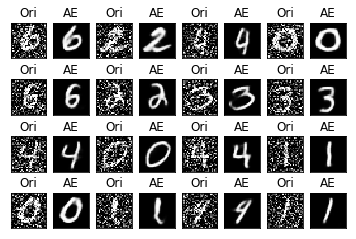

In [29]:
x_denoise = autoencoder.predict(x_test_noisy)
for i in range(16):
    plt.subplot(4, 8, 1 + i*2, xticks=[], yticks=[])
    img_id = np.random.randint(np.shape(x_test_noisy)[0])
    im = x_test_noisy[img_id,::].reshape([28,28])
    plt.imshow(im)
    plt.gray()
    plt.title('Ori')
    plt.subplot(4, 8, 2 + i*2, xticks=[], yticks=[])
    
    im = x_denoise[img_id,::].reshape([28,28])
    plt.imshow(im)
    plt.gray()
    plt.title('AE')